In [ ]:
import pandas as pd

train =pd.read_csv('/content/train_data_highkappa.csv')
train.head()

,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [ ]:
train['Target']=train['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Issue', 'Analysis', 'Facts', 'Conclusion',
       'Rule/Law/Holding'], dtype=object)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Class=3, n=475 (16.096%)
Class=4, n=190 (6.438%)
Class=0, n=439 (14.876%)
Class=2, n=1510 (51.169%)
Class=1, n=147 (4.981%)
Class=5, n=190 (6.438%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


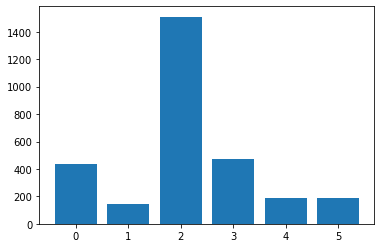

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(2951, 5835)


In [ ]:
from sklearn.externals import joblib
joblib.dump(tfidf_vect, '/content/tf_idf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/tf_idf.pkl']

In [ ]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,1008,1008a,101,1013,1015,1026,104,1044,105,1065,107,107c,1081,1084,1097,10a,11,110,1102,1116,112,113,1130,113637,114073,115,1150,1161,1183,1185,1191,...,œstarted,œstraight,œsuccessively,œswayingâ,œswollenâ,œtesting,œtestâ,œthat,œthatâ,œthe,œthere,œthey,œthick,œthis,œto,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œwell,œwhat,œwhen,œwhere,œwhile,œwhoever,œwilfullyâ,œwillfullyâ,œyesâ,œyou,œyour
0,0.133931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=1510 (16.667%)
Class=Issue, n=1510 (16.667%)
Class=Analysis, n=1510 (16.667%)
Class=Facts, n=1510 (16.667%)
Class=Conclusion, n=1510 (16.667%)
Class=Rule/Law/Holding, n=1510 (16.667%)


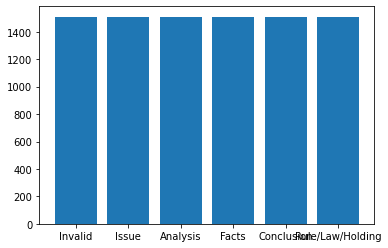

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#using smote and stochastic gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.9301185124642419
                  precision    recall  f1-score   support

        Analysis       0.89      0.94      0.91       391
      Conclusion       0.95      0.99      0.97       393
           Facts       0.92      0.76      0.83       414
         Invalid       0.89      0.90      0.89       418
           Issue       0.95      1.00      0.98       406
Rule/Law/Holding       0.97      0.99      0.98       425

        accuracy                           0.93      2447
       macro avg       0.93      0.93      0.93      2447
    weighted avg       0.93      0.93      0.93      2447



In [ ]:
unlabel = pd.read_csv(r'/content/Unlabeled_data.csv')
unlabel.head()

,Unnamed: 0,text,Complete
0,0,No motion for rehearing filed.,1
1,1,— Relator is under accusation of killing her h...,1
2,2,From an order of the District Judge of the 39t...,1
3,3,Relator and her husband had been married for a...,1
4,4,The evidence indicates that their family relat...,1


In [ ]:
del unlabel['Complete']

In [ ]:
del unlabel['Unnamed: 0']

In [ ]:
unlabel.head()

,text
0,No motion for rehearing filed.
1,— Relator is under accusation of killing her h...
2,From an order of the District Judge of the 39t...
3,Relator and her husband had been married for a...
4,The evidence indicates that their family relat...


In [ ]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [ ]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
unlabel.head()

,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [ ]:
len(unlabel)

537703

In [ ]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [ ]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [ ]:
x_un1.shape

(100001, 5835)

In [ ]:
pred_unlabel_1 = sgd.predict(x_un1)

In [ ]:
unlabel_1['Target']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
0,motion rehearing filed,Facts
1,relator accusation killing husband virgil clark,Facts
2,order district judge 39th judicial district re...,Facts
3,relator husband married number year,Facts
4,evidence indicates family relation always plea...,Facts


In [ ]:
train = train.rename(columns={'Sentence':'text'})
train.head()

,Unnamed: 0,text,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Invalid
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [ ]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
len(train_1)

102952

In [ ]:
x_train_1 = tfidf_vect.transform(train_1['text'])
x_train_1.shape

(102952, 5835)

In [ ]:
X, y = oversample.fit_resample(x_train_1, train_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8928586932928153
                  precision    recall  f1-score   support

        Analysis       0.88      0.87      0.87     11735
      Conclusion       0.95      0.92      0.94     11531
           Facts       0.91      0.80      0.86     11386
         Invalid       0.89      0.86      0.87     11538
           Issue       0.89      0.93      0.91     11480
Rule/Law/Holding       0.85      0.98      0.91     11435

        accuracy                           0.89     69105
       macro avg       0.89      0.89      0.89     69105
    weighted avg       0.89      0.89      0.89     69105



In [ ]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])
x_un2.shape

(100000, 5835)

In [ ]:
pred_unlabel_2 = sgd.predict(x_un2)

In [ ]:
unlabel_2['Target']=pred_unlabel_2
unlabel_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
100001,responding conclusion regarding evidence annou...,Conclusion
100002,conviction transporting intoxicating liquor pu...,Rule/Law/Holding
100003,bill exception case filed late,Facts
100004,motion new trial overruled october 22 1927 ord...,Facts
100005,thereafter december 10th extension order made ...,Facts


In [ ]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
len(train_2)

202952

In [ ]:
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape

(202952, 5835)

In [ ]:
X, y = oversample.fit_resample(x_train_2, train_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9036821302267527
                  precision    recall  f1-score   support

        Analysis       0.90      0.88      0.89     20829
      Conclusion       0.95      0.94      0.94     20995
           Facts       0.94      0.82      0.88     20767
         Invalid       0.91      0.87      0.89     20903
           Issue       0.89      0.94      0.91     20709
Rule/Law/Holding       0.85      0.97      0.91     20779

        accuracy                           0.90    124982
       macro avg       0.91      0.90      0.90    124982
    weighted avg       0.91      0.90      0.90    124982



In [ ]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])
x_un3.shape

(100000, 5835)

In [ ]:
pred_unlabel_3 = sgd.predict(x_un3)

In [ ]:
unlabel_3['Target']=pred_unlabel_3
unlabel_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
200001,another man carrying clothes,Facts
200002,officer testified appellant several item cloth...,Invalid
200003,investigation followed report breaking entry a...,Facts
200004,appellant present,Issue
200005,warrant arrest issued officer went hotel waite...,Facts


In [ ]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
len(train_3)

302952

In [ ]:
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape

(302952, 5835)

In [ ]:
X, y = oversample.fit_resample(x_train_3, train_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9105443364456508
                  precision    recall  f1-score   support

        Analysis       0.91      0.89      0.90     29459
      Conclusion       0.95      0.94      0.95     29492
           Facts       0.95      0.83      0.89     29564
         Invalid       0.92      0.88      0.90     29626
           Issue       0.89      0.95      0.92     29706
Rule/Law/Holding       0.86      0.97      0.91     29727

        accuracy                           0.91    177574
       macro avg       0.91      0.91      0.91    177574
    weighted avg       0.91      0.91      0.91    177574



In [ ]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])
x_un4.shape


(100000, 5835)

In [ ]:
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
unlabel_4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
300001,statute final judgment appeal court lie senten...,Rule/Law/Holding
300002,sentence must pronounced term court judgment r...,Rule/Law/Holding
300003,court sentence defendant vacation,Invalid
300004,court adjourned authority case ceased notice a...,Analysis
300005,pronouncing sentence authorized vacation autho...,Rule/Law/Holding


In [ ]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
len(train_4)

402952

In [ ]:
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape

(402952, 5835)

In [ ]:
X, y = oversample.fit_resample(x_train_4, train_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9150247879255261
                  precision    recall  f1-score   support

        Analysis       0.91      0.90      0.91     37717
      Conclusion       0.95      0.95      0.95     37742
           Facts       0.96      0.84      0.89     37867
         Invalid       0.93      0.88      0.90     37981
           Issue       0.89      0.95      0.92     37741
Rule/Law/Holding       0.87      0.97      0.92     37877

        accuracy                           0.92    226925
       macro avg       0.92      0.92      0.91    226925
    weighted avg       0.92      0.92      0.91    226925



In [ ]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])
x_un5.shape

(137702, 5835)

In [ ]:
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
unlabel_5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
400001,member federal reserve bank,Invalid
400002,opinion state case,Analysis
400003,conviction violating state cigarette law punis...,Rule/Law/Holding
400004,find record bill exception bringing forward co...,Conclusion
400005,brief appellant complains lack testimony,Issue


In [ ]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
len(train_5)

540654

In [ ]:
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape

(540654, 5835)

In [48]:
X, y = oversample.fit_resample(x_train_5, train_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9201250140283697
                  precision    recall  f1-score   support

        Analysis       0.92      0.90      0.91     49029
      Conclusion       0.95      0.95      0.95     48995
           Facts       0.96      0.85      0.90     48983
         Invalid       0.93      0.89      0.91     48920
           Issue       0.90      0.95      0.92     48867
Rule/Law/Holding       0.88      0.97      0.92     49253

        accuracy                           0.92    294047
       macro avg       0.92      0.92      0.92    294047
    weighted avg       0.92      0.92      0.92    294047



In [49]:
df = pd.read_csv('/content/test_data.csv')

df['Target']=df['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
df['Target']=df['Target'].replace(['Others'],'Invalid')

df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Sentence'] = df['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
df['Sentence'] = df['Sentence'].apply(lambda x: TextBlob(x).words)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

final_test = tfidf_vect.transform(df['Sentence'])

pred_sgd_final = sgd.predict(final_test)
print('Accuracy %s' % accuracy_score(pred_sgd_final,df['Target']))
print(classification_report(df['Target'],pred_sgd_final))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Accuracy 0.5124760076775432
                  precision    recall  f1-score   support

        Analysis       0.40      0.36      0.38        77
      Conclusion       0.56      0.77      0.65        26
           Facts       0.83      0.52      0.64       267
         Invalid       0.34      0.49      0.40        83
           Issue       0.26      0.41      0.32        34
Rule/Law/Holding       0.35      0.76      0.48        34

        accuracy                           0.51       521
       macro avg       0.46      0.55      0.48       521
    weighted avg       0.61      0.51      0.53       521

